In [197]:
from random import randint
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [198]:
def enhance_gama(img,g):
    kernal2=img*(np.power(0.5,g))
    plt.imshow(img+kernal2,cmap="gray")
    return kernal2

In [199]:
def convolute(img , kernal):
    lk,bk=kernal.shape
    img=cv2.resize(img,(200,200))
    img_pad1=np.ones((200+(lk*2),200+(bk*2)))*255
    new_img=np.zeros((200,200))
    for i in range(200):
        for j in range(200):
            img_pad1[i+lk][j+bk]=img[i][j]
    for i in range(lk,200+lk):
        for j in range(bk,200+bk):
            val=0
            for m in range(i-int(lk/2),i+1+int(lk/2)):
                for n in range(j-int(bk/2),j+1+int(bk/2)):
                    if(m-i+1>=lk or n-j+1>=bk):
                        break
                    val+=img_pad1[m][n]*kernal[m-i+1][n-j+1]
            new_img[i-lk][j-bk]=val/(lk*bk)
    return new_img

In [200]:
def enhance_lab(img):
    kernal=np.ones((1,1),np.uint8)
    frame=cv2.resize(img ,(200,200))
    clahe = cv2.createCLAHE(clipLimit=5., tileGridSize=(5,5))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l1 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l1,a,b))  # merge channels
    l, a, b = cv2.split(lab)  # split on 3 different channels
    l1 = clahe.apply(l)  # apply CLAHE to the L-channel
    lab = cv2.merge((l1,a,b))  # merge channels
    img_out = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
    hsv=cv2.cvtColor(img_out, cv2.COLOR_BGR2HSV)
    return img_out,hsv

In [201]:
def edgedetect(img,typee):
    kernals1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    kernals2=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    kx,ky=np.array([]),np.array([])    
    kernalp1=np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
    kernalp2=np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
    if(typee=="p"):
        kx=convolute(img,kernalp1)
        ky=convolute(img,kernalp2)
    elif(typee=="s"):
        kx=convolute(img,kernals1)
        ky=convolute(img,kernals2)
    img_out=np.ones(ky.shape)
    for i in range(ky.shape[0]):
        for j in range(ky.shape[1]):
            img_out[i][j]=np.sqrt((kx[i][j]*kx[i][j])+(ky[i][j]*ky[i][j]))
    return img_out,kx,ky

In [202]:
def resize(images):
    scaled_images=[]
    for i in images:
        if(len(i.shape)==2):
            scaled_images.append(cv2.resize(i ,(200,200)))
        else:
            scaled_images.append(cv2.resize(i ,(200,200)))
    return scaled_images

In [207]:
def visualization_function(img,n):
    img = cv2.resize(img,(200,200))
    orignal=img
    img_gray=cv2.cvtColor(orignal,cv2.COLOR_BGR2GRAY)
    img_lab,img_hsv=enhance_lab(orignal)
    img_out , x_waterfill, y_waterfill=edgedetect(img_gray,'s')
    img_final=img_new-img_out*100
    images=[orignal,img_gray, img_lab,img_hsv, x_waterfill, y_waterfill, img_out, img_final]
    images=resize(images)
    fig = plt.figure(figsize=(10,4))
    fig.suptitle("eye threshing", size=22)
    for i , image in enumerate(images):
        if i<4:
            plt.subplot(2,4,i+1)
            if(len(images[i].shape)==2):plt.imshow(images[i], cmap='gray')
            else:
                images[i]= cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR)
                plt.imshow(images[i])
        else:
            plt.subplot(2,4,i+1)
            if(len(images[i].shape)==2):plt.imshow(images[i], cmap='gray')
            else:
                images[i]= cv2.cvtColor(images[i], cv2.COLOR_RGB2BGR)
                plt.imshow(images[i])
    plt.savefig(f"./processed_images/{n}",dpi=1000)

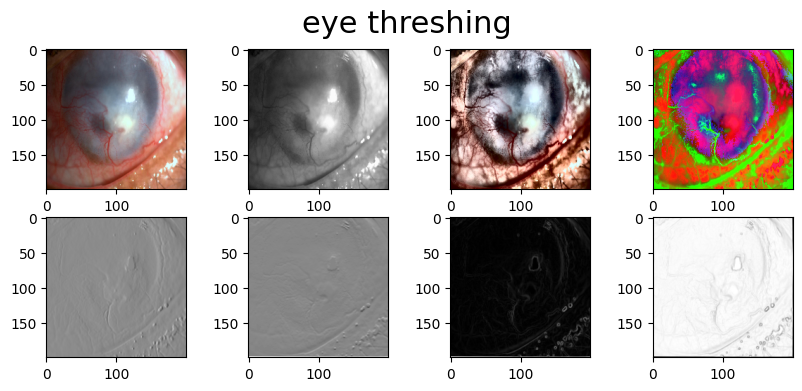

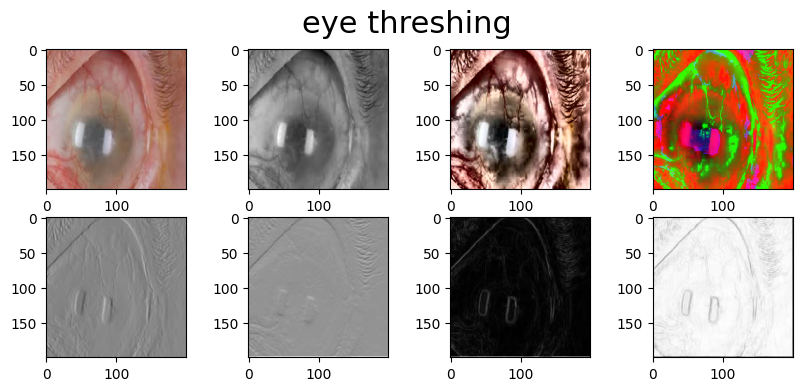

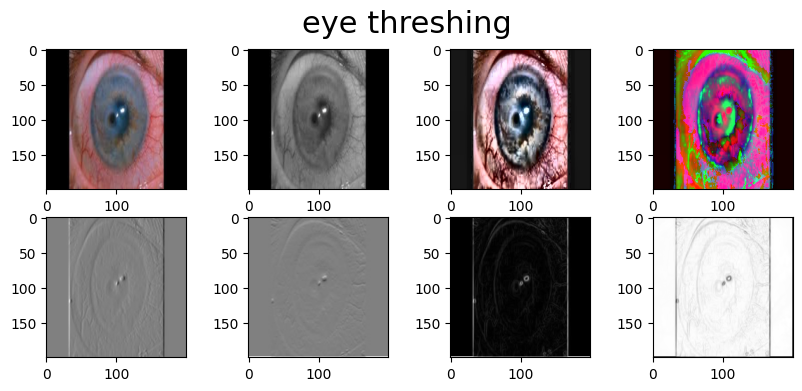

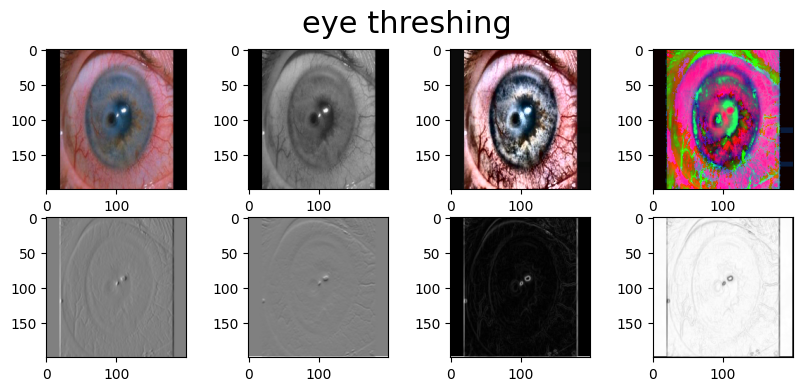

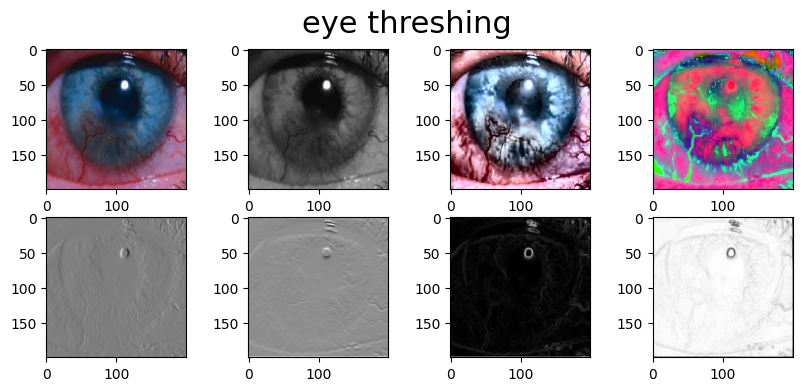

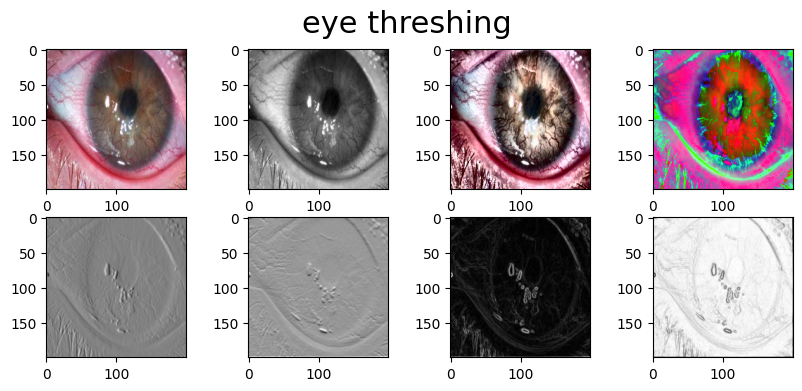

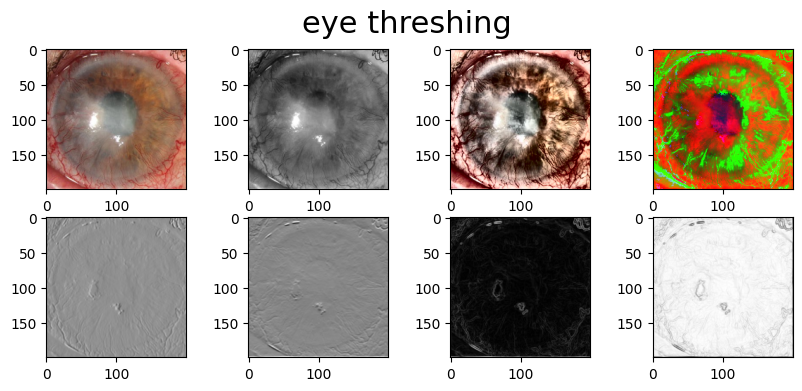

In [208]:
for i in range(8):
    try:
        img=cv2.imread(f"C:\\Users\\mail2\\Desktop\\ml\\resume_stuff\\eye_processing\\eye data\\{i}.jpg")
        visualization_function(img,i)
    except:
        pass